### References 
https://www.analyticsvidhya.com/blog/2021/07/age-and-gender-detection-using-deep-learning/

In [1]:
# Run this before starting 
!pip install keras_applications 
!pip install face_recognition
!pip install opencv-python
!apt-get update && apt-get install libgl1 -y


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 2.7 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 88.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dlib: filename=dlib-19.24.0-cp39-cp39-linux_x86_64.whl size=4365264 sha256=0d7a9d2b0d9fa7bca2fd97498f421bbed4d78d69a7ff9fd0011c45c90828c563
  Stored in directory: /root/.cache/pip/wheels/2e/49/d4/7ca6193a44aeabf8027d79c7e78a861166e630ba3c67d17c78
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=4c6f48bb28bb7873cad8062085dcd47817901bb9bd53c3f5b39e1df90fc5954b
  Stored in directory: /root/.cache/pip/wheels/22/a8/60/4a2aeb763d63f50190f4c4e07069a22245347eeafdb3a67551
Successfully

## Dataset
UTK Dataset comprises age, gender, images, and pixels in .csv format. Age and gender detection according to the images have been researched for a long time

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Ethinicity')

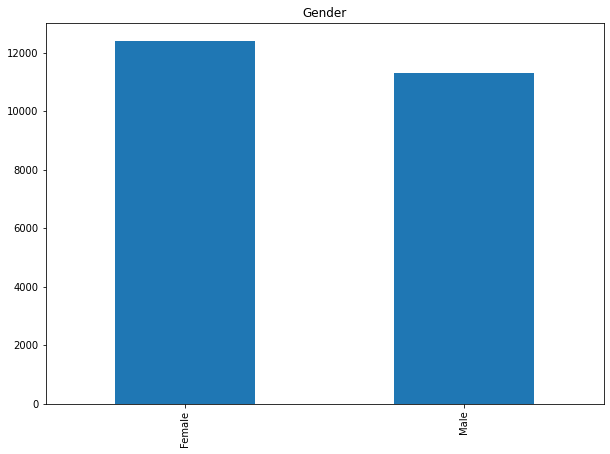

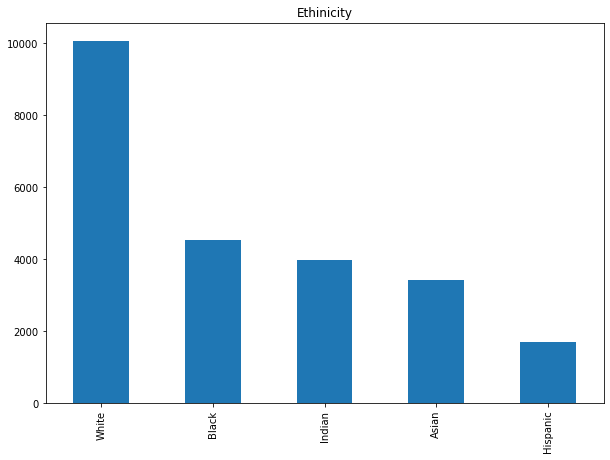

In [3]:
df=pd.read_csv("age_gender.csv")
df1= pd.DataFrame(df)

plt.figure(figsize=(10,7))
ax=df1.gender.value_counts().plot.bar(title='Gender' )
ax.set_xticklabels(['Female', 'Male'])
plt.figure(figsize=(10,7))
labels =['White','Black','Indian','Asian','Hispanic']
ax=df1.ethnicity.value_counts().plot.bar()
ax.set_xticklabels(labels)
ax.set_title('Ethinicity')

In [4]:
df1['pixels'][0].split()

['129',
 '128',
 '128',
 '126',
 '127',
 '130',
 '133',
 '135',
 '139',
 '142',
 '145',
 '149',
 '147',
 '145',
 '146',
 '147',
 '148',
 '149',
 '149',
 '150',
 '153',
 '153',
 '153',
 '152',
 '153',
 '153',
 '153',
 '153',
 '153',
 '151',
 '149',
 '147',
 '146',
 '146',
 '144',
 '143',
 '140',
 '134',
 '129',
 '129',
 '126',
 '122',
 '121',
 '119',
 '118',
 '118',
 '99',
 '53',
 '130',
 '129',
 '128',
 '126',
 '127',
 '130',
 '135',
 '141',
 '143',
 '143',
 '144',
 '145',
 '143',
 '142',
 '144',
 '145',
 '146',
 '149',
 '149',
 '148',
 '151',
 '151',
 '151',
 '151',
 '152',
 '153',
 '153',
 '153',
 '153',
 '149',
 '148',
 '147',
 '146',
 '146',
 '142',
 '141',
 '138',
 '133',
 '130',
 '130',
 '128',
 '123',
 '124',
 '122',
 '120',
 '117',
 '98',
 '52',
 '131',
 '129',
 '130',
 '129',
 '129',
 '134',
 '138',
 '144',
 '145',
 '143',
 '143',
 '139',
 '140',
 '138',
 '139',
 '140',
 '142',
 '145',
 '147',
 '149',
 '151',
 '149',
 '149',
 '149',
 '151',
 '152',
 '151',
 '150',
 '150',
 '14

In [5]:
## Converting pixels into numpy array
df1['pixels'] = df1['pixels'].apply(lambda x:  np.reshape(np.array(x.split(), dtype="float32"), (48,48)))
df1.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 13..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175..."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79..."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 20..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 21..."


In [6]:
# ! Reference: #lambda arguments : expression  
x = lambda a : a + 10
print(x(5))

15


In [7]:
# Function for plotting the image
def plot_data(rows, cols, lower_value, upper_value):

    # Creating a figure of subplots like a table 
    fig = plt.figure(figsize=(cols*3,rows*4))
    
    for i in range(1, cols*rows + 1):
        # Selecting a random row 
        k = np.random.randint(lower_value,upper_value)
        fig.add_subplot(rows, cols, i)  # adding sub plot in the current cell i
        gender = ['Female' if df.gender[k] == 1 else 'Male']
        ethnicity = labels[df.ethnicity[k]]
        age = df.age[k]
        im = df.pixels[k]
        plt.imshow(im,cmap='plasma')
        plt.axis('off')
        plt.title(f'Gender:{gender}\tAge:{age}\tEthnicity:{ethnicity}')
        plt.tight_layout()
        plt.show()

<ipython-input-7-372ddb381db8>:18: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


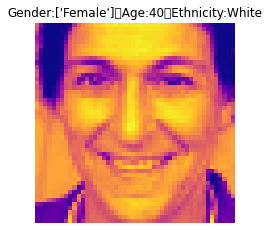

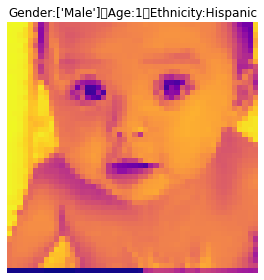

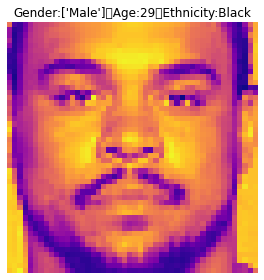

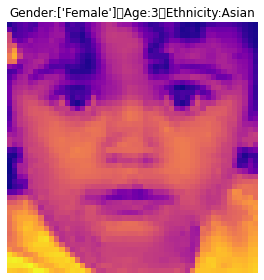

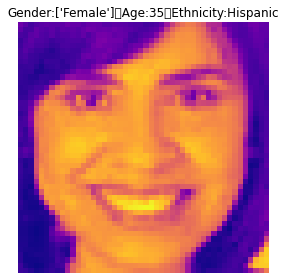

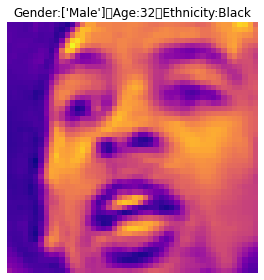

In [8]:
plot_data(rows=3,cols=2,lower_value=0,upper_value=len(df))

In [9]:
# Importing Libraries
import keras
import tensorflow as tf
from keras.layers import Input
import json
import sys
import tensorflow as tf
from keras.layers import Input
import numpy as np
import argparse
from keras_applications.resnext import ResNeXt50
from keras.utils.data_utils import get_file
import face_recognition
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image


(23705, 5)


(-0.5, 47.5, 47.5, -0.5)

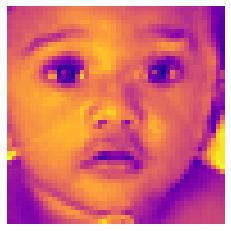

In [10]:
df=pd.read_csv("age_gender.csv")
df.head()
df1= pd.DataFrame(df)
df1['pixels'] = df1.pixels.apply(lambda x: np.reshape(np.array(x.split(' '),dtype='float32'),(48,48)))
df1['pixels']= df1['pixels']/255
print(df1.shape)
im = df1['pixels'][45]
im
plt.imshow(im, cmap='plasma')
plt.axis('off')

In [11]:
# image indexes to choose for reference
# df1.shape

In [12]:
X = np.zeros(shape=(23705,48,48))

# Iterating through all the rows
for i in range(len(df1["pixels"])):
    X[i] = df1["pixels"][i]

# X = df1['pixels']
print(X.dtype)
#Age
ag = df1['age']
ag=ag.astype(float)
ag= np.array(ag)
ag.shape

float64


(23705,)

In [13]:
g = df1['gender']
g = np.array(g)
g.shape

(23705,)

In [14]:
# creating a list of age and gender generated
labels_f =[]


i=0

while i <len(g):

  label=[]

  label.append([ag[i]])

  label.append([g[i]])

  labels_f.append(label)

  i+=1

# Both age and gender are combined and stored in labels_f, 
# we will further convert the list into array.

labels_f = np.array(labels_f)
labels_f.shape

(23705, 2, 1)

In [15]:
# Splitting the train and test data
import tensorflow as tf

from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test= train_test_split(X,labels_f,test_size=0.25)

print(X_test.shape)

print(X_train.shape)

print(Y_test.shape)

print(Y_train.shape)

(5927, 48, 48)
(17778, 48, 48)
(5927, 2, 1)
(17778, 2, 1)


In [17]:
Y_train_2= [Y_train[:,1],Y_train[:,0]]
Y_test_2= [Y_test[:,1],Y_test[:,0]]

- The `Dropout layer` randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

-  The `Dropout layer` is a mask that nullifies the contribution of some neurons towards the next layer and leaves unmodified all others

- `Batch-Normalization (BN)` is an algorithmic method which makes the training of Deep Neural Networks (DNN) faster and more stable. It consists of normalizing activation vectors from hidden layers using the first and the second statistical moments (mean and variance) of the current batch.

- Batch normalization is a layer that allows every layer of the network to do learning more independently. It is used to normalize the output of the previous layers. The activations scale the input layer in normalization

- `Dense Layer` is simple layer of neurons in which each neuron receives input from all the neurons of previous layer


In [18]:
from tensorflow.keras.layers import Dropout,Flatten,BatchNormalization

from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D

from tensorflow.keras.layers import Input,Activation,Add

from tensorflow.keras.models import Model

from tensorflow.keras.regularizers import l2

from tensorflow.keras.optimizers import Adam

import tensorflow as tf

In [19]:
def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),
    kernel_regularizer=l2(0.001))(input_tensor) #parameter


    # Cov2D(some ) -> func
    # func(input_tensor)
    # Regularizer to apply a penalty on the layer's kernel

    x = Dropout(0.1)(x)

    x = Activation('relu')(x)

    return x

def model(input_shape):

  inputs = Input((input_shape))

  conv_1= Convolution(inputs,32)

  maxp_1 = MaxPooling2D(pool_size = ( 2, 2)) (conv_1) #combine significant patches

  conv_2 = Convolution(maxp_1,64)

  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2) 

  conv_3 = Convolution(maxp_2,128)

  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)

  conv_4 = Convolution(maxp_3,256)

  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)

  flatten= Flatten() (maxp_4)

  dense_1= Dense(64,activation='relu')(flatten)

  dense_2= Dense(64,activation='relu')(flatten)

  drop_1=Dropout(0.2)(dense_1)

  drop_2=Dropout(0.2)(dense_2)

  output_1= Dense(1,activation="sigmoid",name='sex_out')(drop_1)

  output_2= Dense(1,activation="relu",name='age_out')(drop_2)

  model = Model(inputs=[inputs], outputs=[output_1,output_2])

  model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",

  metrics=["accuracy"])

  return model


In [20]:
Model=model((48,48,1))
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 48, 48, 32)   320         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 48, 48, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 48, 48, 32)   0           ['dropout[0][0]']                
                                                                                              

In [21]:
# ! References Storing Function as a variable
# def return_func():
#     return sum

# a = return_func()
# a([2,2])

The most commonly used filter size is 2×2 and it is slid over the input using a stride of 2. Based on the type of pooling operation you've selected, the pooling filter calculates an output on the receptive field (the part of the feature map under the filter). There are several approaches to pooling.

In [ ]:
History=Model.fit(X_train,Y_train_2,batch_size=64,
    validation_data=(X_test,Y_test_2),
    epochs=10)

Epoch 1/10
278/278 [==============================] - 148s 529ms/step - loss: 16.9187 - sex_out_loss: 0.7000 - age_out_loss: 16.0345 - sex_out_accuracy: 0.5164 - age_out_accuracy: 0.0472 - val_loss: 16.3165 - val_sex_out_loss: 0.6923 - val_age_out_loss: 15.4615 - val_sex_out_accuracy: 0.5279 - val_age_out_accuracy: 0.0471
Epoch 2/10
278/278 [==============================] - 147s 530ms/step - loss: 14.9636 - sex_out_loss: 0.6924 - age_out_loss: 14.0982 - sex_out_accuracy: 0.5209 - age_out_accuracy: 0.0475 - val_loss: 13.4247 - val_sex_out_loss: 0.6919 - val_age_out_loss: 12.5275 - val_sex_out_accuracy: 0.5279 - val_age_out_accuracy: 0.0471
Epoch 3/10
278/278 [==============================] - 145s 521ms/step - loss: 12.4995 - sex_out_loss: 0.6926 - age_out_loss: 11.5639 - sex_out_accuracy: 0.5209 - age_out_accuracy: 0.0457 - val_loss: 12.5332 - val_sex_out_loss: 0.6917 - val_age_out_loss: 11.5725 - val_sex_out_accuracy: 0.5279 - val_age_out_accuracy: 0.0471
Epoch 4/10
278/278 [========

In [ ]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 8s 41ms/step - loss: 9.3397 - sex_out_loss: 0.3858 - age_out_loss: 8.5578 - sex_out_accuracy: 0.8341 - age_out_accuracy: 0.0491


[9.339710235595703,
 0.3857804238796234,
 8.557767868041992,
 0.8341488242149353,
 0.04909735172986984]

In [ ]:
pred=Model.predict(X_test)
pred[1]

186/186 [==============================] - 8s 40ms/step


array([[30.362919 ],
       [22.589386 ],
       [ 3.2806141],
       ...,
       [23.22636  ],
       [13.937304 ],
       [44.267036 ]], dtype=float32)

1/1 [==============================] - 0s 16ms/step
[array([[0.7346225]], dtype=float32), array([[18.666937]], dtype=float32)]
Predicted Age: 19
Predicted Sex: Male


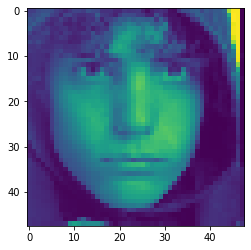

In [ ]:
def test_image(ind,X,Model):

  plt.imshow(X[ind])

  image_test=X[ind]

  pred_1=Model.predict(np.array([image_test]))

  sex_f=['Female','Male']
  print(pred_1)

  age=int(np.round(pred_1[1][0]))

  sex=int(np.round(pred_1[0][0]))

  print("Predicted Age: "+ str(age))

  print("Predicted Sex: "+ sex_f[sex])

test_image(1980,X, Model)

In [ ]:
pred[0]


array([[0.17433955],
       [0.38672933],
       [0.46375272],
       ...,
       [0.6266057 ],
       [0.8683509 ],
       [0.89237154]], dtype=float32)

In [ ]:

model_json = Model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
Model.save_weights("model.h5")

In [ ]:
!sudo pip install h5py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 106.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 81.3 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e398e659-25d9-4c3f-8424-c955520614a4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>